In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('strategy-2-data.csv', sep=';')    
df

,day,timestamp,product,bid_price_1,bid_volume_1,bid_price_2,bid_volume_2,bid_price_3,bid_volume_3,ask_price_1,ask_volume_1,ask_price_2,ask_volume_2,ask_price_3,ask_volume_3,mid_price,profit_and_loss
0,0,0,AMETHYSTS,9998,9,9995.0,23.0,NaN,NaN,10005,23,NaN,NaN,NaN,NaN,10001.5,0.0
1,0,0,STARFRUIT,5036,23,NaN,NaN,NaN,NaN,5043,23,NaN,NaN,NaN,NaN,5039.5,0.0
2,0,100,AMETHYSTS,10002,1,10000.0,2.0,9998.0,4.0,10004,1,10005.0,21.0,NaN,NaN,10003.0,0.0
3,0,100,STARFRUIT,5042,1,5039.0,2.0,5037.0,1.0,5043,22,NaN,NaN,NaN,NaN,5042.5,0.0
4,0,200,AMETHYSTS,9996,1,9995.0,21.0,NaN,NaN,10004,1,10005.0,21.0,NaN,NaN,10000.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,0,99700,AMETHYSTS,9995,26,NaN,NaN,NaN,NaN,10005,26,NaN,NaN,NaN,NaN,10000.0,1696.0
1996,0,99800,AMETHYSTS,9996,1,9995.0,25.0,NaN,NaN,10002,5,10004.0,1.0,10005.0,25.0,9999.0,1704.0
1997,0,99800,STARFRUIT,5051,1,5050.0,25.0,NaN,NaN,5057,26,NaN,NaN,NaN,NaN,5054.0,-2991.0
1998,0,99900,AMETHYSTS,9998,6,9996.0,1.0,9995.0,27.0,10004,1,10005.0,27.0,NaN,NaN,10001.0,1704.0


In [11]:
import numpy as np

# X is the timestamp of data for product == STARFRUIT
X = df[df['product'] == 'STARFRUIT']['timestamp'].values

# Y is the price of data for product == STARFRUIT
Y = df[df['product'] == 'STARFRUIT']['mid_price'].values


# Fit a polynomial of degree 4 (change this degree as needed)
degree = 10
coefficients = np.polyfit(X, Y, degree)

# coefficients will be an array of length degree + 1
print("Coefficients:", coefficients)


Coefficients: [-3.67723427e-45  1.98205427e-39 -4.59430927e-34  5.97162705e-29
 -4.75729229e-24  2.38224945e-19 -7.37135838e-15  1.31753734e-10
 -1.15116734e-06  3.01848559e-03  5.03787525e+03]


In [13]:
class HardCodedPolynomialPredictor:
    def __init__(self):
        # Hard-coded coefficients from the model
        self.coefficients = coefficients  # Example coefficients

    def predict(self, x):
        y = 0
        for i, coef in enumerate(self.coefficients):
            y += coef * (x ** (len(self.coefficients) - i - 1))
        return y

# Example usage
predictor = HardCodedPolynomialPredictor()
print(predictor.predict(300))  # Predict the value at X = 2


5038.68069098831


In [14]:
# get the line that TimeStamp == 100
df[df['timestamp'] == 300]

,day,timestamp,product,bid_price_1,bid_volume_1,bid_price_2,bid_volume_2,bid_price_3,bid_volume_3,ask_price_1,ask_volume_1,ask_price_2,ask_volume_2,ask_price_3,ask_volume_3,mid_price,profit_and_loss
6,0,300,STARFRUIT,5042,1,5037.0,26.0,NaN,NaN,5044,26,NaN,NaN,NaN,NaN,5043.0,0.0
7,0,300,AMETHYSTS,9995,26,NaN,NaN,NaN,NaN,10005,26,NaN,NaN,NaN,NaN,10000.0,5.0


C:\Users\Thieu\AppData\Local\Temp\ipykernel_9328\1762680604.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  product_df['timestamp'] = pd.to_datetime(product_df['timestamp'], unit='s') # Adjust the unit parameter if needed


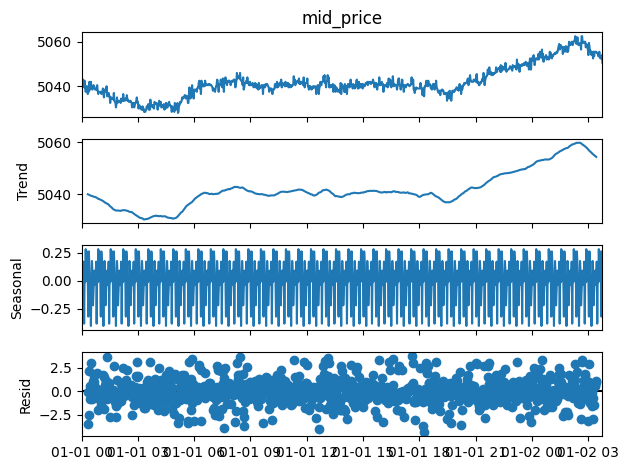

In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima.model import ARIMA

# Load your dataset into a pandas DataFrame
# df = pd.read_csv('path_to_your_data.csv')

df = pd.read_csv('strategy-2-data.csv', sep=';')

# Filter for a single product
product_df = df[df['product'] == 'STARFRUIT']

# Convert 'timestamp' to datetime if it's not already in that format
product_df['timestamp'] = pd.to_datetime(product_df['timestamp'], unit='s') # Adjust the unit parameter if needed

# Set 'timestamp' as the index
product_df.set_index('timestamp', inplace=True)

# Make sure the data is in chronological order
product_df.sort_index(inplace=True)

# Extract the mid_price for the selected product
data = product_df['mid_price'].dropna()

# Assuming you know the frequency of your data, for example, if 'timestamp' represents hourly data, set period=24 for daily seasonality
period = 24  # Replace with the correct period based on your domain knowledge

# Step 1: Decompose the time series
result = seasonal_decompose(data, model='additive', period=period)

# Plot the decomposed components
result.plot()
plt.show()

# Continue with the rest of your script for model fitting and prediction
# ...


c:\Users\Thieu\anaconda3\envs\DataAnalyst_2\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency 100s will be used.
  self._init_dates(dates, freq)
c:\Users\Thieu\anaconda3\envs\DataAnalyst_2\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency 100s will be used.
  self._init_dates(dates, freq)
c:\Users\Thieu\anaconda3\envs\DataAnalyst_2\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency 100s will be used.
  self._init_dates(dates, freq)
c:\Users\Thieu\anaconda3\envs\DataAnalyst_2\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Users\Thieu\anaconda3\envs\DataAnalyst_2\Lib\s

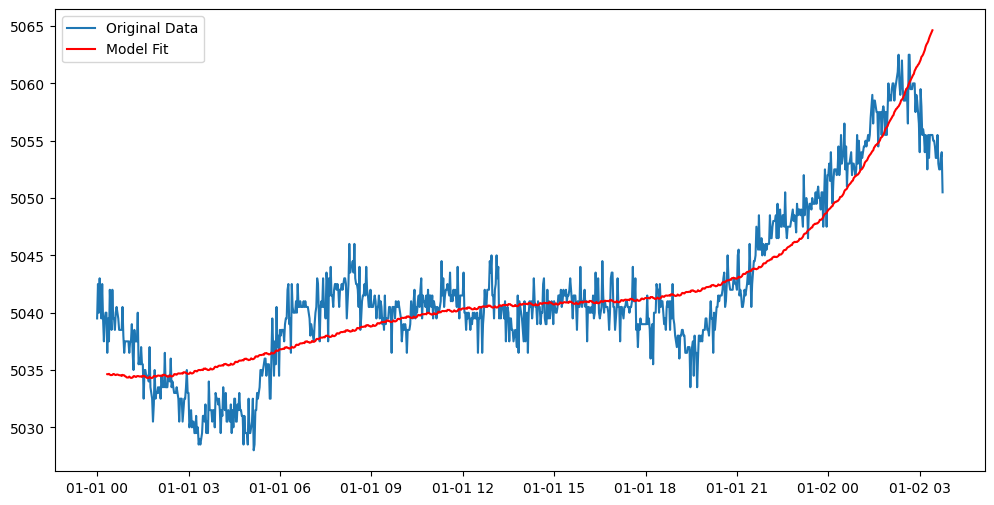

In [25]:
# After decomposing with seasonal_decompose and plotting the components...
import matplotlib.dates as mdates

# Clean NaN values from the trend and seasonal components
trend = result.trend.dropna()
seasonal = result.seasonal.dropna()
time_points_trend = trend.index
time_points_seasonal = seasonal.index

# Step 2: Fit models to trend and seasonal components

# Trend - Fit a polynomial model
# Choose the degree based on your data's characteristics
degree = 4
z = np.polyfit(mdates.date2num(time_points_trend.to_pydatetime()), trend, degree)
p = np.poly1d(z)

# Assuming trend and seasonal are pandas Series obtained from the decomposed components

# Find the common index where both trend and seasonal are not NaN
common_index = trend.dropna().index.intersection(seasonal.dropna().index)

# Align the trend and seasonal components to the common index
aligned_trend = trend.loc[common_index]
aligned_seasonal = seasonal.loc[common_index]

# Ensure that the time_points for trend and seasonal are also aligned
time_points_trend = aligned_trend.index
time_points_seasonal = aligned_seasonal.index

# Now fit your models to the aligned components
# Fit the polynomial model to the trend
z = np.polyfit(mdates.date2num(time_points_trend.to_pydatetime()), aligned_trend, degree)
p = np.poly1d(z)

# Fit the ARIMA model to the seasonal component
seasonal_model = ARIMA(aligned_seasonal, order=(1, 0, 1))
seasonal_model_fit = seasonal_model.fit()

# Now predict using the fitted models
trend_fit = p(mdates.date2num(time_points_trend.to_pydatetime()))
seasonal_fit = seasonal_model_fit.predict(start=time_points_seasonal[0], end=time_points_seasonal[-1])

# Make sure the trend_fit and seasonal_fit are aligned before combining
# They should be the same length now, but let's check and align them if not
if len(trend_fit) != len(seasonal_fit):
    min_length = min(len(trend_fit), len(seasonal_fit))
    trend_fit = trend_fit[:min_length]
    seasonal_fit = seasonal_fit[:min_length]

# Combine the trend and seasonal fits
combined_fit = trend_fit + seasonal_fit

# Plotting code remains the same...


# Now let's visualize the combined fit with the original data
plt.figure(figsize=(12, 6))
plt.plot(data.index, data, label='Original Data')
plt.plot(time_points_trend, combined_fit, label='Model Fit', color='red')
plt.legend()
plt.show()


In [27]:
# After fitting the polynomial trend and ARIMA models...

# Extract polynomial coefficients for the trend
trend_coefficients = p.coefficients
print("Trend Coefficients:", trend_coefficients)

# Extract ARIMA model parameters for seasonality
arima_params = seasonal_model_fit.params
print("ARIMA Parameters:", arima_params)


Trend Coefficients: [ 146.58600854 -265.91992498  148.58125092  -15.17681689 5034.82034279]
ARIMA Parameters: const    -0.000018
ar.L1     0.694597
ma.L1    -0.999829
sigma2    0.028693
dtype: float64


Index(['day', 'timestamp', 'product', 'bid_price_1', 'bid_volume_1',
       'bid_price_2', 'bid_volume_2', 'bid_price_3', 'bid_volume_3',
       'ask_price_1', 'ask_volume_1', 'ask_price_2', 'ask_volume_2',
       'ask_price_3', 'ask_volume_3', 'mid_price', 'profit_and_loss'],
      dtype='object')
[34.95416609  0.39244518  0.24708895  0.14171926  0.21181824]
      mid_price  mid_price_t-1  mid_price_t-2  mid_price_t-3  mid_price_t-4  \
9        5040.5         5043.0         5040.0         5042.5         5039.5   
11       5039.5         5040.5         5043.0         5040.0         5042.5   
13       5042.5         5039.5         5040.5         5043.0         5040.0   
14       5039.5         5042.5         5039.5         5040.5         5043.0   
17       5037.5         5039.5         5042.5         5039.5         5040.5   
...         ...            ...            ...            ...            ...   
1991     5052.5         5053.0         5055.5         5053.5         5053.5   
1993  

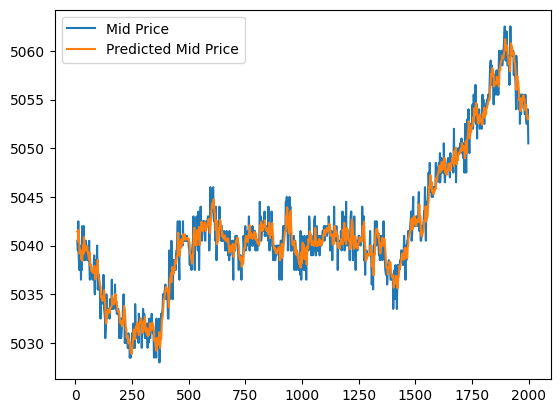

In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


df: pd.DataFrame = pd.read_csv("strategy-2-data.csv", delimiter=";")
print(df.columns)

# isolate mid prices into a single frame
mid_prices: pd.DataFrame = df[df["product"] == "STARFRUIT"]["mid_price"].to_frame()

# add frames with shifted data from previously
for i in range (1, 5):
    mid_prices[f"mid_price_t-{i}"] = mid_prices["mid_price"].shift(i)
mid_prices.dropna(inplace = True)

# prepare features and labels
X = mid_prices[['mid_price_t-1', 'mid_price_t-2', 'mid_price_t-3', 
       'mid_price_t-4']].values
y = mid_prices["mid_price"].values

# Add a column of ones to X for the intercept
X = np.hstack([np.ones((X.shape[0], 1)), X])

# Step 2: Compute the coefficients using the Normal Equation
theta = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(y)

print(theta)

# add a sixth column to the mid_prices frame, using theta to calculate the predicted mid price
mid_prices["predicted_mid_price"] = X.dot(theta)

print(mid_prices)

# use plt to plot the mid prices and the predicted mid prices
plt.plot(mid_prices.index, mid_prices["mid_price"], label="Mid Price")
plt.plot(mid_prices.index, mid_prices["predicted_mid_price"], label="Predicted Mid Price")
plt.legend()
plt.show()

In [31]:
theta

array([34.95416609,  0.39244518,  0.24708895,  0.14171926,  0.21181824])